<a href="https://colab.research.google.com/github/c-e-leiva/procesamientoDelHabla/blob/main/Regresion_LeivaCarlosEzequiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MACHINE LEARNING** 🤖📊
##**REGRESION - DESAFIO**


## **INDICACIONES:**

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo


---


## **CONSIGNAS:** 📌

- Dataset: Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión. Describa como generó los datos.

- Preprocesamiento: Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

- Modelos: Elija al menos dos modelos de regresión de los vistos en clases. Entrene dichos modelos. Detalle los hiperparámetros elegidos.

- Evaluación: Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

- Ejercicio de hiper parámetro tunning: Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

- Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.

---

# **Dataset sobre la Vida Útil de Electrodomésticos Eléctricos**

Este dataset incluye 1000 registros que simulan la vida útil de electrodomésticos eléctricos, facilitando el análisis de variables como el tipo de producto, uso diario, marca y potencia. Estas variables permiten explorar cómo influyen en la durabilidad de los electrodomésticos.

## **Variables:**
- **Tipo de Producto** (Categórica): Lavarropa, Heladera, Tostadora, Microondas.
- **Uso Diario (horas)** (Numérica): Promedio de horas de uso diario.
- **Marca** (Categórica): Marca del electrodoméstico (Marca A, B, C).
- **Potencia (W)** (Numérica): Potencia en watts (800W - 3000W).
- **Vida Útil (años)** (Continua): Duración estimada en años.

## **Descripción del Código:**

Este código emplea las librerías `pandas` y `numpy` para generar un dataset sintético que simula la vida útil de electrodomésticos. Se establece una semilla con `np.random.seed(5)` para garantizar la reproducibilidad de los resultados. Se crean 1000 registros con variables que incluyen el tipo de producto (Lavarropa, Heladera, Tostadora y Microondas), uso diario (entre 1 y 8 horas), marca (Marca A, B y C) y potencia (entre 800W y 3000W). La vida útil se calcula considerando el uso diario, el tipo de electrodoméstico (donde los lavarropas suelen durar menos y las heladeras más) y la marca (donde la 'Marca A' incrementa la vida útil y la 'Marca C' la disminuye). Finalmente, se presenta una vista previa de las primeras 6 filas del dataset.


## Generar el dataset:

In [1]:
# Importación de las Librerías:
import pandas as pd
import numpy as np
# Semilla para Reproducibilidad
np.random.seed(5)  # Establecer la semilla para resultados consistentes
n = 1000  # Cantidad de registros a generar

# Definición de variables
productos = np.random.choice(['Lavarropa', 'Heladera', 'Tostadora', 'Microondas'], n)
uso_diario = np.round(np.random.uniform(1, 8, n), 1)  # Uso entre 1 y 8 horas diarias
marcas = np.random.choice(['Marca A', 'Marca B', 'Marca C'], n)
potencias = np.random.choice([800, 1500, 2000, 2500, 3000], n)  # Potencia en watts

# Cálculo de vida útil con un poco de aleatoriedad
# La vida útil base es 20 años. Disminuye con el uso diario.
# Los lavarropas suelen durar 2 años menos.
# Las heladeras suelen durar 3 años más.
# Marca A aumenta la vida útil en 1 año, mientras que Marca C la reduce en 1 año.
vida_util = (
    20 - uso_diario * np.random.uniform(0.5, 1.5, n)  # Disminuye con el uso diario
    + (np.where(productos == 'Lavarropa', -2, 0))  # Los lavarropas suelen durar menos
    + (np.where(productos == 'Heladera', 3, 0))  # Las heladeras suelen durar más
    + (np.where(marcas == 'Marca A', 1, np.where(marcas == 'Marca C', -1, 0)))  # Variación según marca
)
# Crear el DataFrame
df_electrodomesticos = pd.DataFrame({
    'tipo_de_producto': productos,
    'uso_diario': uso_diario,
    'marca': marcas,
    'potencia': potencias,
    'vida_util': np.round(vida_util, 1)
})

# Revisar el dataset
print(df_electrodomesticos.head(6))

  tipo_de_producto  uso_diario    marca  potencia  vida_util
0       Microondas         7.2  Marca A      1500       15.5
1        Tostadora         7.3  Marca A      2000       12.3
2       Microondas         4.9  Marca B       800       12.8
3         Heladera         6.7  Marca B       800       13.9
4        Tostadora         4.7  Marca A      2500       16.1
5        Tostadora         1.7  Marca C      2500       17.5


# **Preprocesamiento**

La preparación de datos es fundamental antes de entrenar modelos de machine learning, ya que asegura que la información esté limpia, estructurada y normalizada, mejorando así la precisión del modelo. En mi conjunto de datos de electrodomésticos, esto incluye la transformación de variables categóricas en representaciones numéricas, la normalización de variables numéricas y la división del dataset en conjuntos de entrenamiento y prueba.

1. **Conversión de Variables Categóricas**: Utilizo `OneHotEncoder` para transformar características como "Tipo de Producto" y "Marca" en variables numéricas.
   
2. **Normalización de Variables Numéricas**: Aplico `StandardScaler` a variables como "Uso Diario (horas)" y "Potencia (W)" para asegurar que tengan una media de 0 y una desviación estándar de 1.

3. **Separación de Conjuntos**: Divido el dataset en conjuntos de entrenamiento y prueba, utilizando el 20% de los datos para evaluación.

El proceso de preprocesamiento comienza identificando las variables categóricas (`tipo_de_producto`, `marca`) y numéricas (`uso_diario`, `potencia`), con `vida_util` como variable objetivo. Se separan estas características en `X` e `y`, y se aplican transformaciones usando `ColumnTransformer`, que incluye `OneHotEncoder` para las variables categóricas y `StandardScaler` para las numéricas. Finalmente, se divide el dataset en conjuntos de entrenamiento y prueba mediante `train_test_split` para evaluar el rendimiento del modelo.


In [2]:
# Importamos las bibliotecas necesarias para el procesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definimos las variables categóricas y numéricas
categorical_features = ['tipo_de_producto', 'marca']  # Características categóricas a codificar
numerical_features = ['uso_diario', 'potencia']        # Características numéricas a normalizar

# Creamos el DataFrame X (características) y y (variable objetivo)
X = df_electrodomesticos.drop('vida_util', axis=1)  # Eliminamos la variable objetivo del DataFrame de características
y = df_electrodomesticos['vida_util']                # Variable que queremos predecir

# Usamos OneHotEncoder para convertir las variables categóricas en variables numéricas
# y StandardScaler para escalar las variables numéricas a una distribución estándar.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Normalización de las características numéricas
        ('cat', OneHotEncoder(), categorical_features)   # Codificación de las características categóricas
    ]
)

# Creamos un pipeline que aplicará el preprocesamiento a los datos
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])  # Definimos el paso de preprocesamiento en el pipeline

# Aplicamos el preprocesamiento a las características
X_processed = pipeline.fit_transform(X)  # Ajustamos y transformamos X en una sola línea

# División de los datos en conjuntos de entrenamiento y prueba
# Utilizamos el 20% de los datos para el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")  # Tamaño del conjunto de entrenamiento
print(f"\nTamaño del conjunto de prueba: {X_test.shape}")         # Tamaño del conjunto de prueba


Tamaño del conjunto de entrenamiento: (800, 9)

Tamaño del conjunto de prueba: (200, 9)


## **Modelos**

## Entrenamiento del Modelo de Regresión Lineal

Este código crea y entrena un modelo de regresión lineal con los datos de entrenamiento (X_train y y_train) y genera predicciones sobre el conjunto de prueba (X_test), almacenándolas en y_pred_linear.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

##Entrenamiento del Modelo de Lasso

En este bloque, se ajusta un modelo de Lasso con alpha=0.1 para los datos de entrenamiento, generando predicciones en el conjunto de prueba. La regularización de Lasso ayuda a reducir el sobreajuste y realiza selección de características.



In [4]:
from sklearn.linear_model import Lasso

# Crear una instancia del modelo Lasso con un hiperparámetro alpha inicial
lasso_model = Lasso(alpha=0.1)

# Ajustar el modelo a los datos de entrenamiento
lasso_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

## Evaluación de Desempeño de Modelos

Este bloque calcula y muestra las métricas de evaluación para el modelo de Lasso y el de regresión lineal, utilizando el Mean Squared Error (MSE) y el coeficiente de determinación (R²). Estas métricas permiten comparar la precisión y ajuste de ambos modelos sobre los datos de prueba (y_test).

In [5]:
# Calcular métricas para el modelo Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calcular métricas para el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Imprimir los resultados
print("Modelo Regresión Lineal:")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"R^2 Score: {r2_linear:.4f}")

print("\nModelo Lasso:")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R^2 Score: {r2_lasso:.4f}")

Modelo Regresión Lineal:
Mean Squared Error: 1.9546
R^2 Score: 0.7862

Modelo Lasso:
Mean Squared Error: 2.0175
R^2 Score: 0.7794


## Ejercicio de Optimización de Hiperparámetros con GridSearchCV

Este ejercicio optimiza el modelo Lasso ajustando el hiperparámetro alpha para analizar su impacto en el desempeño del modelo. Se prueban distintos valores de alpha con el objetivo de encontrar el equilibrio óptimo: valores altos de alpha pueden llevar a un subajuste del modelo, mientras que valores bajos podrían generar sobreajuste. Este análisis permite identificar el valor de alpha que mejor balancea la precisión y la capacidad de generalización del modelo.

El gráfico muestra la relación entre el alpha y el Error Cuadrático Medio (MSE) en los datos de entrenamiento y prueba. Comparando los valores de MSE en ambos conjuntos, es posible identificar el alpha óptimo que minimiza el error y mantiene un ajuste adecuado sin sobreajustar.

Eje X (Alpha): Valores de alpha evaluados en una escala logarítmica.

Eje Y (MSE): Error Cuadrático Medio (MSE), donde los valores más bajos representan un mejor rendimiento del modelo.

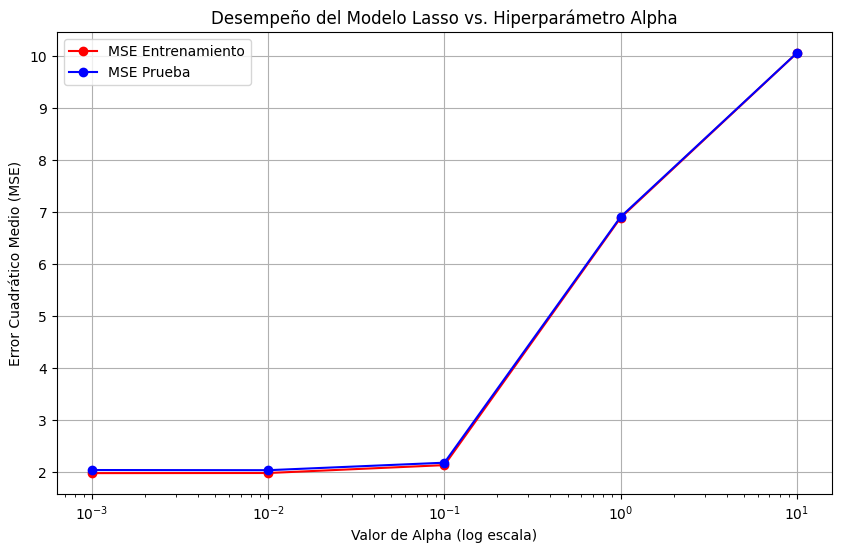


Mejor valor de alpha: 0.01



In [6]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Definimos el rango de hiperparámetros a probar
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Ajustamos el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores resultados
best_alpha = grid_search.best_params_['alpha']
mean_train_scores = -grid_search.cv_results_['mean_train_score']
mean_test_scores = -grid_search.cv_results_['mean_test_score']

# Graficar las métricas de desempeño
plt.figure(figsize=(10, 6))
plt.plot(param_grid['alpha'], mean_train_scores, label='MSE Entrenamiento', marker='o', color='red')
plt.plot(param_grid['alpha'], mean_test_scores, label='MSE Prueba', marker='o', color='blue')
plt.xscale('log')  # Usar escala logarítmica para el eje X
plt.title('Desempeño del Modelo Lasso vs. Hiperparámetro Alpha')
plt.xlabel('Valor de Alpha (log escala)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.legend()
plt.grid()
plt.show()

# Imprimir el mejor valor de alpha
print(f"\nMejor valor de alpha: {best_alpha}\n")

Tras realizar el ajuste de hiperparámetros, se identificó que el valor óptimo de alpha para el modelo Lasso es 0.01. Este valor logra un equilibrio entre la precisión y la generalización, minimizando el error cuadrático medio (MSE) en los datos de prueba sin caer en sobreajuste ni subajuste.

# Gráfico: Predicciones vs. Valores Reales

Este gráfico muestra la precisión del modelo ajustado con el mejor valor de alpha, comparando las predicciones generadas con los valores reales del conjunto de prueba. La visualización permite evaluar la calidad del ajuste y la capacidad predictiva del modelo.

Eje X (Valores Reales): Valores reales del conjunto de prueba.
Eje Y (Predicciones): Predicciones generadas por el modelo.
Línea Diagonal Roja: Línea de referencia donde las predicciones coinciden con los valores reales. Los puntos cercanos a esta línea indican predicciones precisas.

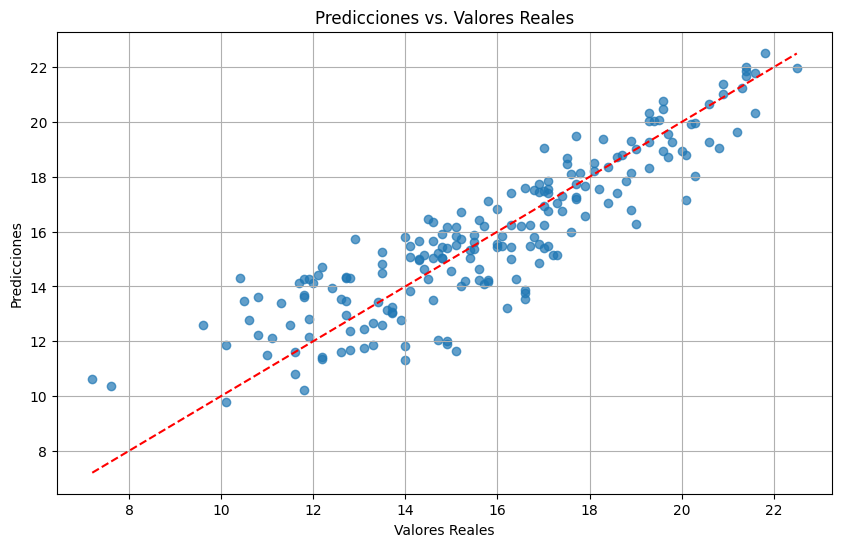

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ajustar el modelo con el mejor alpha
best_model = Lasso(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()

## Análisis de Modelos para Predecir la Vida Útil de los Electrodomésticos Eléctricos 🔍📊

El análisis de los modelos aplicados para predecir la vida útil de los electrodomésticos eléctricos revela diferencias significativas en su desempeño. La Regresión Lineal presentó un Error Cuadrático Medio (MSE) de 1.95 y un R² Score de 0.79, lo que sugiere que el modelo es capaz de explicar el 79% de la variabilidad en la variable objetivo. En contraste, el modelo Lasso mostró un MSE de 2.02 y un R² Score de 0.78, lo que indica una ligera disminución en su capacidad predictiva. La optimización del hiperparámetro alpha en el modelo Lasso resultó en un valor óptimo de 0.01, que proporciona un balance entre la precisión del modelo y su generalización, minimizando el riesgo de sobreajuste o subajuste. Estos resultados sugieren que, aunque ambos modelos son viables, la regresión lineal es más efectiva para la predicción precisa de la duración de los electrodomésticos, lo que la convierte en la opción preferida en este contexto.


## Recursos Utilizados 🛠️📚

### Librerías de Python:
- **Scikit-learn**: Para implementar modelos de regresión lineal y Lasso, así como para la evaluación del rendimiento del modelo.
- **NumPy**: Para la manipulación de datos y operaciones matemáticas.
- **Matplotlib**: Para la visualización de resultados a través de gráficos.

### Documentación:
- Documentación oficial de **Scikit-learn** para entender la implementación y los parámetros de los modelos utilizados.

### Clases de Aprendizaje Automático:
- Se utilizaron conceptos y técnicas aprendidas en las clases de aprendizaje automático, que proporcionaron una base sólida para la implementación y evaluación de los modelos.

### Plataformas de Aprendizaje:
- **YouTube**: Se consultaron tutoriales específicos sobre regresión lineal y Lasso para comprender mejor los conceptos y la implementación práctica. [Enlace a video](https://www.youtube.com/watch?v=uitCGluYcnE)
- **Asistencia de ChatGPT**: Utilicé ChatGPT para obtener aclaraciones sobre conceptos técnicos y recomendaciones para el análisis de resultados.

## Prompts Utilizados ✍️

### Consultas sobre Implementación:
- "¿Cómo puedo implementar un modelo de regresión lineal en Python usando Scikit-learn?"
- "¿Qué parámetros debo considerar al utilizar Lasso para regresión en Scikit-learn?"

### Evaluación de Modelos:
- "¿Cuáles son las métricas más comunes para evaluar el rendimiento de un modelo de regresión?"
- "¿Cómo interpreto los resultados de una regresión Lasso?"
